In [66]:
#Packages for visualisation
#Scikit-Learn Packages
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#Visualisation and Other packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [67]:
iris = datasets.load_iris() 

In [68]:
print (iris.keys())

['target_names', 'data', 'target', 'DESCR', 'feature_names']


In [69]:
print (type(iris.data), type(iris.target))

(<type 'numpy.ndarray'>, <type 'numpy.ndarray'>)


In [70]:
iris.data.shape

(150, 4)

In [71]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='|S10')

In [72]:
X = iris.data
y = iris.target
#Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=21, stratify=y)
df = pd.DataFrame(X_train, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                6.4               3.2                4.5               1.5
1                6.0               2.2                4.0               1.0
2                5.7               2.5                5.0               2.0
3                5.8               4.0                1.2               0.2
4                6.5               3.0                5.2               2.0


In [73]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
sepal length (cm)    105 non-null float64
sepal width (cm)     105 non-null float64
petal length (cm)    105 non-null float64
petal width (cm)     105 non-null float64
dtypes: float64(4)
memory usage: 3.4 KB
None


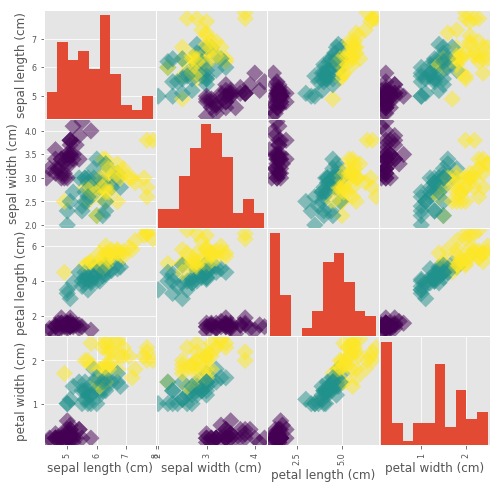

In [76]:
#Visual EDA
plt.figure()
pd.plotting.scatter_matrix(df, c = y_train, figsize = [8, 8], s=150, marker = 'D') 
plt.show()

In [77]:
#Building Classifier on the Iris Dataset
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [78]:
y_prediction = knn.predict(X_test)

In [57]:
print ("Prediction on Test Sample : \n {}".format(y_prediction))

Prediction on Test Sample : 
 [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [79]:
#KNN Score Computation for Unlabelled Data
knn.score(X_test, y_test) 

0.9555555555555556

In [64]:
#Nearest Neighbors v/s Accuracy
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

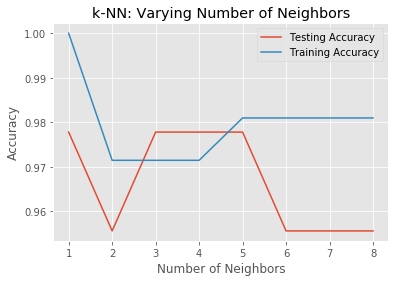

In [65]:
# Compute plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Classifier Accuracy')
plt.show()